In [1]:
import os
os.environ["PATH"] += os.pathsep + '/opt/homebrew/bin/dot'
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import numpy as np 
import pandas as pd

In [2]:
possible_weather_conditions = ["sunny", "rainy", "snowy", "foggy"]
possible_activities = ["0-swimming", "1-coffee", "2-skiing", "3-stay_home"]
condition_activity_connection = list(zip(possible_weather_conditions, possible_activities))
random_indices = np.random.choice([el for el in range(len(possible_weather_conditions))], 1000, replace = True, p = [0.50, 0.125, 0.125, 0.25])
conditions_activities = [condition_activity_connection[i] for i in random_indices]
df_dict = {}
for possible_weather_condition in possible_weather_conditions:
    df_dict[possible_weather_condition] = np.array([condition_activity[0] == possible_weather_condition for condition_activity in conditions_activities], dtype=np.int32)
df_dict["activity"] = np.array([condition_activity[1] for condition_activity in conditions_activities])
df = pd.DataFrame(df_dict)

In [4]:
df.head()

,sunny,rainy,snowy,foggy,activity
0,0,0,1,0,2-skiing
1,1,0,0,0,0-swimming
2,0,0,0,1,3-stay_home
3,1,0,0,0,0-swimming
4,0,0,0,1,3-stay_home


In [5]:
df.drop(["activity"], axis = 1).sum(axis = 0)

sunny    489
rainy    137
snowy    127
foggy    247
dtype: int64

In [6]:
decision_tree_classifier = DecisionTreeClassifier(criterion="entropy")
decision_tree_classifier.fit(df.drop("activity", axis = 1, inplace=False), df["activity"])

DecisionTreeClassifier(criterion='entropy')

In [9]:
def calculate_entropy(df):
    entropy = 0
    for key, prob in (df.value_counts()/df.shape[0]).to_dict().items(): 
        entropy += (-prob * np.log2(prob).item())
    return entropy

In [10]:
calculate_entropy(df.activity)

1.773969497603372

In [11]:
dot_data = export_graphviz(decision_tree_classifier, out_file=None, filled=True, rounded = True, feature_names=possible_weather_conditions, class_names=possible_activities)
graph = graphviz.Source(dot_data)

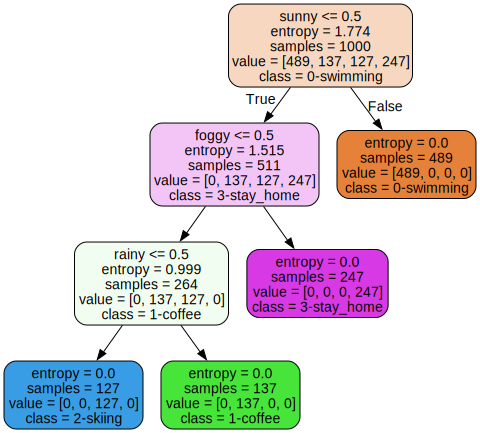

In [12]:
graph